## question 1

In [3]:
print('Jessica Shen')
print('email: jshen30@jhu.edu')
print('github id: jshen30')


Jessica Shen
email: jshen30@jhu.edu
github id: jshen30


probability of failure if temp is 74 degrees:
0.10706182602611791


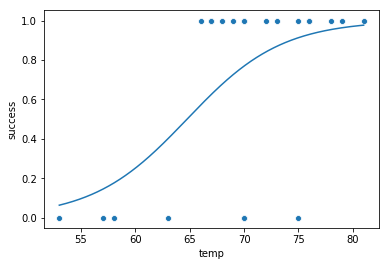

In [2]:
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

! if [ ! -e orings.csv ] ; \
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/orings.csv; \
fi

df = pd.read_csv("/content/orings.csv")

total = df.Total.to_numpy()
temp = df.Temperature.to_numpy()

success = (total <= 0).astype(int)

plt.figure()
sns.scatterplot(temp, success)
plt.xlabel('temp')
plt.ylabel('success')

x = df[['Temperature']]
y = success
lr = lm.LogisticRegression(fit_intercept=True, solver = 'lbfgs')
fit = lr.fit(x, y)
beta0, beta1 = [fit.intercept_[0], fit.coef_[0][0]]
#print(beta0, beta1)

n = 1000
xplot = np.linspace(53, 81, n)
eta = beta0 + beta1 * xplot
p = 1 / (1 + np.exp(-eta))

sns.lineplot(xplot, p)


d = beta0 + beta1 * 74
p = 1 / (1 + np.exp(-d))
print('probability of failure if temp is 74 degrees:')
print(1-p)


## question 2

### part a
write out the log likelihood that we would maximize to obtain estimates of the parameters.

$$ \sum_{i= 1}^nY_i \beta_0 (1 - X_i) + \beta_1 \sum_{i = 1}^nY_iX_i - \sum_{i = 1}^n \log(1 + e^{\beta_0(1-X_i)+\beta_iX_i}) $$

$$ n\bar Y_i \beta_0 + (\beta_1 - \beta_0) \sum_{i = 1}^nY_iX_i - \sum_{i = 1}^n \log(1 + e^{\beta_0(1-X_i)+\beta_1X_i}) $$

### part b
split the log likelihood into two parts, one where $X_i=0$ and one where $X_i=1$. 

#### for $X_i = 0$:

$$ n\bar Y_i \beta_0 + (\beta_1 - \beta_0) \sum_{i = 1}^nY_iX_i - \sum_{i = 1}^n \log(1 + e^{\beta_0(1-X_i)+\beta_1X_i}) $$

plugging in $X_i = 0$ results in:

$$ n\bar Y_0 \beta_0 - \sum_{i = 1}^n \log(1 + e^{\beta_0}) $$

#### for $X_i = 1$:

$$ n\bar Y_i \beta_0 + (\beta_1 - \beta_0) \sum_{i = 1}^nY_iX_i - \sum_{i = 1}^n \log(1 + e^{\beta_0(1-X_i)+\beta_1X_i}) $$

plugging in $X_i = 1$ results in:

$$ n\bar Y_1\beta_0 + (\beta_1 - \beta_0) \sum_{i = 1}^nY_i -\sum_{i = 1}^n \log(1 + e^{\beta_1}) $$

#### adding the two log likelihoods:

$$ [n\bar Y_0 \beta_0 - \sum_{i = 1}^n \log(1 + e^{\beta_0})] + [n\bar Y_1\beta_0 + (\beta_1 - \beta_0) \sum_{i = 1}^nY_1 -\sum_{i = 1}^n \log(1 + e^{\beta_1})] $$

### part c
take the derivative log likelihood with respect to $ \beta_0 $:
$$ \frac{\partial}{\partial \beta_0}((n\bar Y_0 \beta_0 - \sum_{i = 1}^n \log(1 + e^{\beta_0}) + n\bar Y_1\beta_0 + (\beta_1 - \beta_0) \sum_{i = 1}^nY_1 -\sum_{i = 1}^n \log(1 + e^{\beta_1}))) $$

$$ = n\bar Y_0 - \frac{\partial}{\partial \beta_0}(\sum_{i = 1}^n \log(1 + e^{\beta_0})) +  n \bar Y_1 - \sum_{i = 1}^nY_1$$

$$ = n\bar Y_0 - \frac{ne^{\beta_0}}{1 + e^{\beta_0}} +  n \bar Y_1 - n \bar Y_1$$

$$ = n\bar Y_0 - \frac{ne^{\beta_0}}{1 + e^{\beta_0}} $$

set equal to 0 because we're maximizing the function:

$$ n\bar Y_0  - \frac{ne^{\beta_0}}{1 + e^{\beta_0}} = 0$$

$$ n\bar Y_0  = \frac{ne^{\beta_0}}{1 + e^{\beta_0}}$$

$$ \bar Y_0  = \frac{e^{\beta_0}}{1 + e^{\beta_0}}$$

$$ (1 + e^{\beta_0})\bar Y_0 = e^{\beta_0}$$

$$ Y_0 = (1 - \bar Y_0)e^{\beta_0}$$

$$ \frac {Y_0}{(1 - \bar Y_0)} = e^{\beta_0}$$

#### therefore:

$$ \hat \beta_0 = \log(\frac {Y_0}{(1 - \bar Y_0)}) $$

repeat and take the derivative log likelihood with respect to $ \beta_1 $:
$$ \frac{\partial}{\partial \beta_0}((n\bar Y_0 \beta_0 - \sum_{i = 1}^n \log(1 + e^{\beta_0}) + n\bar Y_1\beta_0 + (\beta_1 - \beta_0) \sum_{i = 1}^nY_1 -\sum_{i = 1}^n \log(1 + e^{\beta_1}))) $$

$$ = \sum_{i = 1}^nY_1 - \frac{\partial}{\partial \beta_0}(\sum_{i = 1}^n \log(1 + e^{\beta_1})) $$

$$ = n\bar Y_1 - \frac{ne^{\beta_1}}{1 + e^{\beta_1}} $$

set equal to 0 and solve:
$$ n\bar Y_1 - \frac{ne^{\beta_1}}{1 + e^{\beta_1}} = 0$$

use the same mathematical steps from above to solve for beta1-hat.  not typed out because math is redundant.

#### therefore:

$$ \hat \beta_1 = \log(\frac {Y_1}{(1 - \bar Y_1)}) $$

## question 3

In [25]:
! if [ ! -e the-counted-2015.csv ] ; \
  then wget https://raw.githubusercontent.com/ds4bmeIntroFall2019/quiz-3-jshen30/master/the-counted-2015.csv?token=ANDAZUV5G4MVDPACBLKBYMK5RVZRC; \
fi

df = pd.read_csv("https://raw.githubusercontent.com/ds4bmeIntroFall2019/quiz-3-jshen30/master/the-counted-2015.csv?token=ANDAZUXH43HZ7VARDKBDZH25RV324")
df.head(10)

--2019-09-20 02:47:13--  https://raw.githubusercontent.com/ds4bmeIntroFall2019/quiz-3-jshen30/master/the-counted-2015.csv?token=ANDAZUV5G4MVDPACBLKBYMK5RVZRC
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180784 (177K) [text/plain]
Saving to: ‘the-counted-2015.csv?token=ANDAZUV5G4MVDPACBLKBYMK5RVZRC.10’

the-counted-2015.cs 100%[===================>] 176.55K  --.-KB/s    in 0.02s   

2019-09-20 02:47:13 (8.02 MB/s) - ‘the-counted-2015.csv?token=ANDAZUV5G4MVDPACBLKBYMK5RVZRC.10’ saved [180784/180784]



,uid,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,classification,lawenforcementagency,armed
0,2,Matthew Ajibade,22,Male,Black,January,1,2015,1050 Carl Griffin Dr,Savannah,GA,Death in custody,Chatham County Sheriff's Office,No
1,4,Lewis Lembke,47,Male,White,January,2,2015,4505 SW Masters Loop,Aloha,OR,Gunshot,Washington County Sheriff's Office,Firearm
2,5,Michael Kocher Jr,19,Male,White,January,3,2015,2600 Kaumualii Hwy,Kaumakani,HI,Struck by vehicle,Kauai Police Department,No
3,6,John Quintero,23,Male,Hispanic/Latino,January,3,2015,500 North Oliver Ave,Wichita,KS,Gunshot,Wichita Police Department,No
4,7,Tim Elliott,53,Male,Asian/Pacific Islander,January,2,2015,600 E Island Lake Dr,Shelton,WA,Gunshot,Mason County Sheriff's Office,Firearm
5,8,Matthew Hoffman,32,Male,White,January,4,2015,630 Valencia St,San Francisco,CA,Gunshot,San Francisco Police Department,Non-lethal firearm
6,9,Kenneth Buck,22,Male,Hispanic/Latino,January,5,2015,E Knox Rd and N Exeter St,Chandler,AZ,Gunshot,Chandler Police Department,Firearm
7,10,Michael Rodriguez,39,Male,Hispanic/Latino,January,5,2015,818 31st St,Evans,CO,Gunshot,Evans Police Department,Other
8,11,Patrick Wetter,25,Male,White,January,6,2015,800 Howard St,Stockton,CA,Gunshot,Stockton Police Department,Knife
9,12,Brian Pickett,26,Male,Black,January,6,2015,1618 E 123rd St,Los Angeles,CA,Taser,Los Angeles County Sheriff's Department,No
